## Problem 1] Feature selection for practice

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("data/train.csv")
train_df.shape

(1460, 81)

In [4]:
selected_columns = ["GrLivArea", "YearBuilt", "SalePrice"]
train_df[selected_columns].head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## [Problem 2] Estimation and evaluation by linear regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_df[["GrLivArea", "YearBuilt"]].values #numpy array
Y = train_df[["SalePrice"]].values

linear_model = LinearRegression().fit(X, Y)

In [6]:
import numpy as np
pred = linear_model.predict(X)
mse_score = np.round(mean_squared_error(Y, pred), 2)
print(f"MSE = {mse_score}")

MSE = 2182210639.22


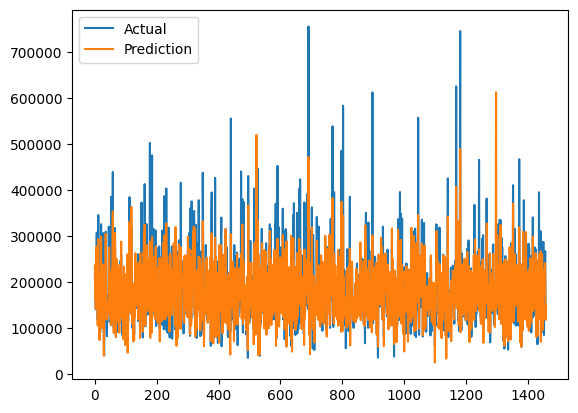

In [7]:
import matplotlib.pyplot as plt

plt.plot(Y, label="Actual")
plt.plot(pred, label="Prediction")
plt.legend()
plt.show()

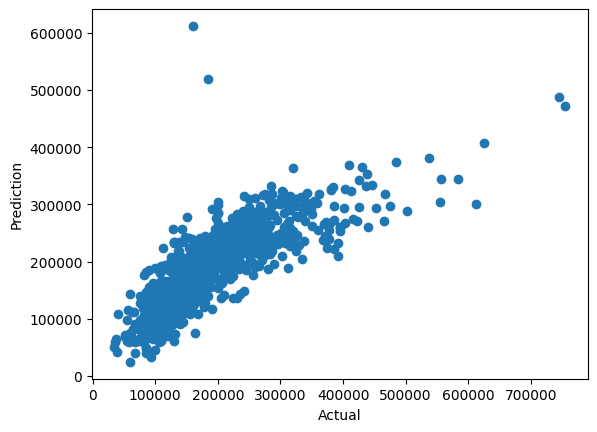

In [8]:
plt.scatter(Y, pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

## [Problem 3] Comparison of methods

In [9]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [11]:
# Model training 
reg_linear = LinearRegression().fit(X_train, Y_train)
reg_svr = SVR().fit(X_train, Y_train)
reg_dt = DecisionTreeRegressor().fit(X_train, Y_train)
reg_rf = RandomForestRegressor().fit(X_train, Y_train)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [12]:
# Model prediction 
pred_linear = reg_linear.predict(X_test)
pred_svr = reg_svr.predict(X_test)
pred_dt = reg_dt.predict(X_test)
pred_rf = reg_rf.predict(X_test)

In [13]:
# Model evaluation
mse_score_linear = np.round(mean_squared_error(Y_test, pred_linear), 2)
print(f"Linear regression MSE = {mse_score_linear}")

mse_score_svr = np.round(mean_squared_error(Y_test, pred_svr), 2)
print(f"SVR regression MSE = {mse_score_svr}")

mse_score_dt = np.round(mean_squared_error(Y_test, pred_dt), 2)
print(f"Decision tree regression MSE = {mse_score_dt}")

mse_score_rf = np.round(mean_squared_error(Y_test, pred_rf), 2)
print(f"Random Forest regression MSE = {mse_score_rf}")

Linear regression MSE = 2314465092.73
SVR regression MSE = 7171025750.7
Decision tree regression MSE = 2478125486.54
Random Forest regression MSE = 1665382090.51


## [Problem 4] (Advance assignment) Learning using other features

In [14]:
cols = train_df.columns

In [15]:
# input variables 
cols = cols[1:-1]
cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Categorical variables into numerical variables
for col in cols:
    if train_df[col].dtype=="object":
        enc = LabelEncoder().fit(train_df[col])
        train_df[col] = enc.transform(train_df[col])

In [18]:
reg_rf = RandomForestRegressor().fit(train_df[cols], train_df[["SalePrice"]])

C:\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [19]:
df_feat_importance = pd.DataFrame()
df_feat_importance["columns"] = cols
df_feat_importance["importance"] = reg_rf.feature_importances_

In [20]:
df_feat_importance = df_feat_importance.sort_values(by="importance", ascending=False)
df_feat_importance

,columns,importance
16,OverallQual,5.693568e-01
45,GrLivArea,1.085912e-01
43,2ndFlrSF,4.420933e-02
37,TotalBsmtSF,4.027755e-02
33,BsmtFinSF1,2.760267e-02
...,...,...
38,Heating,7.380838e-05
74,MiscVal,3.696348e-05
73,MiscFeature,2.888373e-05
4,Street,5.883224e-06


In [21]:
the_best_10_cols = df_feat_importance["columns"].iloc[:20].tolist()

In [22]:
the_best_10_cols

['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'YearBuilt',
 'LotFrontage',
 'Neighborhood',
 'GarageYrBlt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'FullBath',
 'OpenPorchSF',
 'WoodDeckSF',
 'OverallCond']

In [23]:
X = train_df[the_best_10_cols].fillna(0).values
Y = train_df[["SalePrice"]].values
X.shape

(1460, 20)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [25]:
# Model training 
reg_linear = LinearRegression().fit(X_train, Y_train)
reg_svr = SVR().fit(X_train, Y_train)
reg_dt = DecisionTreeRegressor().fit(X_train, Y_train)
reg_rf = RandomForestRegressor().fit(X_train, Y_train)

# Model prediction 
pred_linear = reg_linear.predict(X_test)
pred_svr = reg_svr.predict(X_test)
pred_dt = reg_dt.predict(X_test)
pred_rf = reg_rf.predict(X_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
# Model evaluation
mse_score_linear = np.round(mean_squared_error(Y_test, pred_linear), 2)
print(f"Linear regression MSE = {mse_score_linear}")

mse_score_svr = np.round(mean_squared_error(Y_test, pred_svr), 2)
print(f"SVR regression MSE = {mse_score_svr}")

mse_score_dt = np.round(mean_squared_error(Y_test, pred_dt), 2)
print(f"Decision tree regression MSE = {mse_score_dt}")

mse_score_rf = np.round(mean_squared_error(Y_test, pred_rf), 2)
print(f"Random Forest regression MSE = {mse_score_rf}")

Linear regression MSE = 1231217743.52
SVR regression MSE = 7185283120.27
Decision tree regression MSE = 1544674002.39
Random Forest regression MSE = 701314299.05
